<a href="https://colab.research.google.com/github/kmaloba/OOP-repository/blob/main/PART_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

GENERATE A MACHINE LEARNING MODEL SUITABLE FOR PREDICTING THE AGE OF ABALONE

In [ ]:
# Encode categorical variable 'Sex'
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])

In [ ]:
# Define features and target variable
X = train_df.drop(columns=['id', 'Rings'])
y = train_df['Rings']

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Validate model
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Validation Mean Absolute Error: {mae:.2f}")

Validation Mean Absolute Error: 1.30


TO PREDICT THE AGE OF THE ABALONE SPECIES IN THE TESTING DATASET (I.E. TEST.CSV)

In [ ]:
# Encode categorical variable 'Sex' in test data
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

In [ ]:
# Prepare test data
X_test = test_df.drop(columns=['id'])
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Predict on test dataset
test_predictions = model.predict(X_test_scaled)
test_df['Rings_Predicted'] = test_predictions

In [ ]:
# Save predictions
test_df[['id', 'Rings_Predicted']].to_csv("Abalone_Age_Predictions.csv", index=False)
print("Predictions saved to Abalone_Age_Predictions.csv")


Predictions saved to Abalone_Age_Predictions.csv


GENERATE THE EVENT LOGS FOR THE ABOVE DATASET AND SAVE THEM AS QUESTION 2

In [ ]:
# Load dataset
patient_df = pd.read_csv('PatientReviews.csv')

In [ ]:
print(patient_df.columns)

Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')


In [ ]:
#Check for Hidden Characters
patient_df.rename(columns=lambda x: x.strip(), inplace=True)
print(patient_df.columns.tolist())  # Check again

['patient', 'action', 'org:resource', 'DateTime']


In [ ]:
# Convert DateTime to datetime format
patient_df['DateTime'] = pd.to_datetime(patient_df['DateTime'])

In [ ]:
patient_df = patient_df.sort_values(by=['patient', 'DateTime'])
patient_df.to_csv("Question_2_Event_Logs.csv", index=False)
print("Event logs saved as Question_2_Event_Logs.csv")

Event logs saved as Question_2_Event_Logs.csv


GENERATE A VISUAL SHOWING “ACTIONS” UNDERTAKEN AT THE HOSPITAL BETWEEN JANUARY 2017 AND JUNE 2017

C:\Users\GADGET DUUKA\AppData\Local\Temp\ipykernel_13168\4065126294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_df['action'], order=filtered_df['action'].value_counts().index, palette="coolwarm")


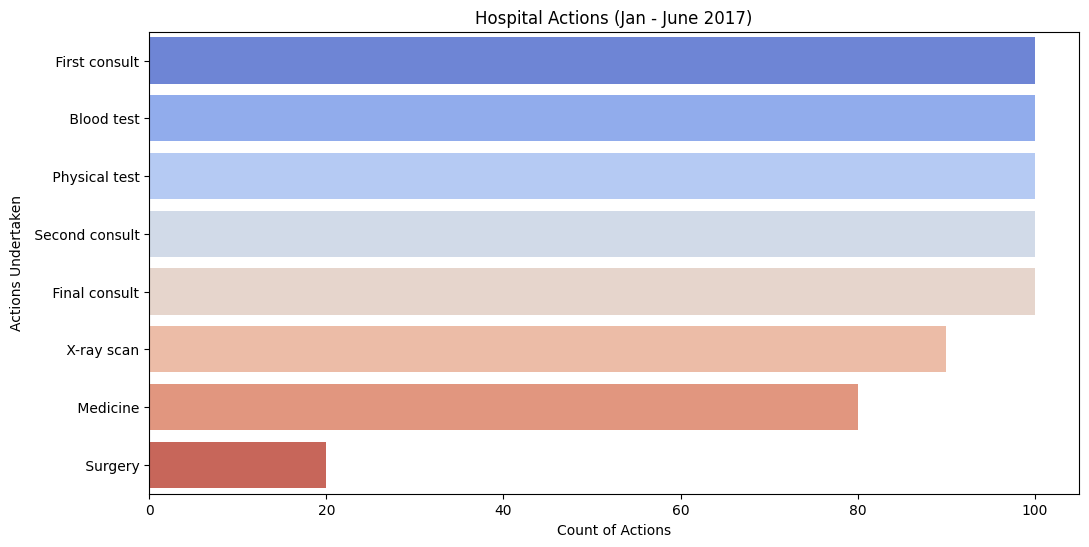

In [ ]:
filtered_df = patient_df[(patient_df['DateTime'] >= '2017-01-01') & (patient_df['DateTime'] <= '2017-06-30')]
plt.figure(figsize=(12,6))
sns.countplot(y=filtered_df['action'], order=filtered_df['action'].value_counts().index, palette="coolwarm")
plt.xlabel("Count of Actions")
plt.ylabel("Actions Undertaken")
plt.title("Hospital Actions (Jan - June 2017)")
plt.show()

USING APPROPRIATE PROCESS MINING ALGORITHMS, SHOW THE FLOW OF “ACTIONS” UNDERTAKEN AT THE HOSPITAL

In [ ]:
!pip install pm4py


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pm4py

In [ ]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer


In [ ]:
pip install graphviz --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Create event log
event_log = pm4py.format_dataframe(patient_df, case_id='patient', activity_key='action', timestamp_key='DateTime')

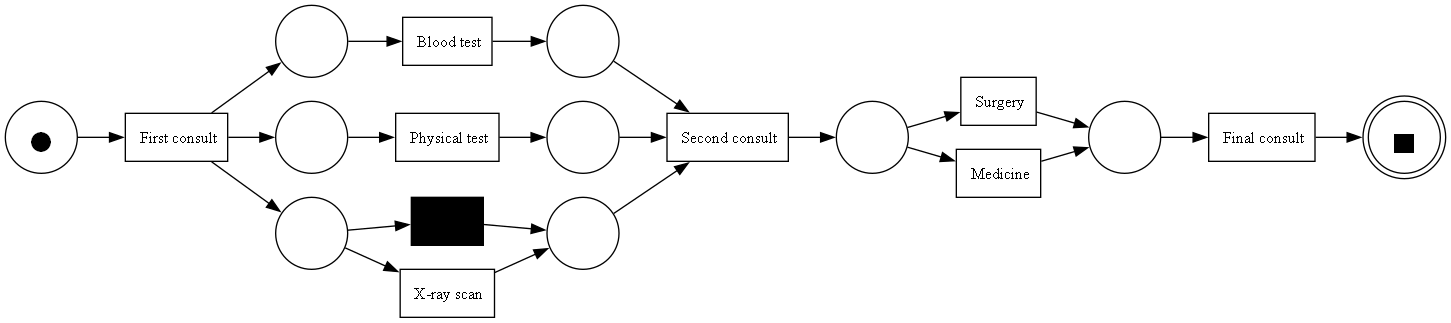

In [ ]:
# Discover process model
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
petri_net_image = pm4py.visualization.petri_net.visualizer.apply(net, initial_marking, final_marking)
pm4py.visualization.petri_net.visualizer.view(petri_net_image)


In [ ]:
print("Process flow generated.")

Process flow generated.
